<a href="https://colab.research.google.com/github/nthin2504/2403a52l02-AIML/blob/main/AIML_ass_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
test_df = pd.read_csv('/content/titanic_test.csv')
print(test_df)
train_df = pd.read_csv('/content/titanic_train.csv')
print(train_df)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [ ]:
print(train_df.dtypes)
print(test_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
train_df.describe(percentiles=[.25, .50, .75, .90])
test_df.describe(percentiles=[.25, .50, .75, .90])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
90%,1267.300000,3.000000,50.000000,1.000000,1.300000,79.200000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [12]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


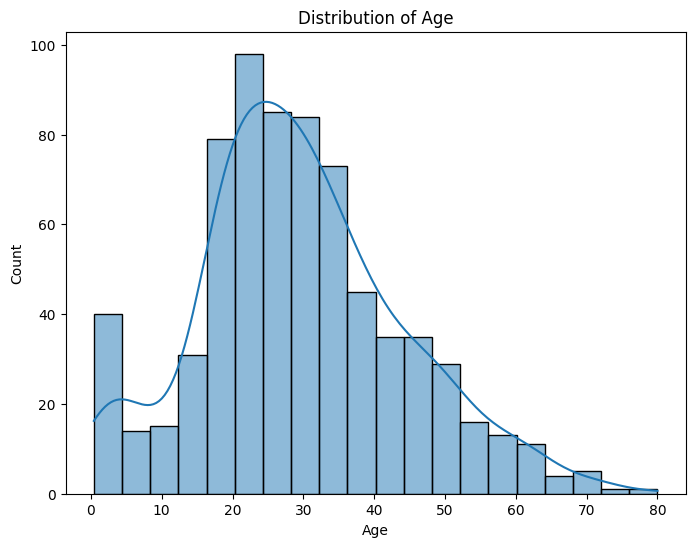

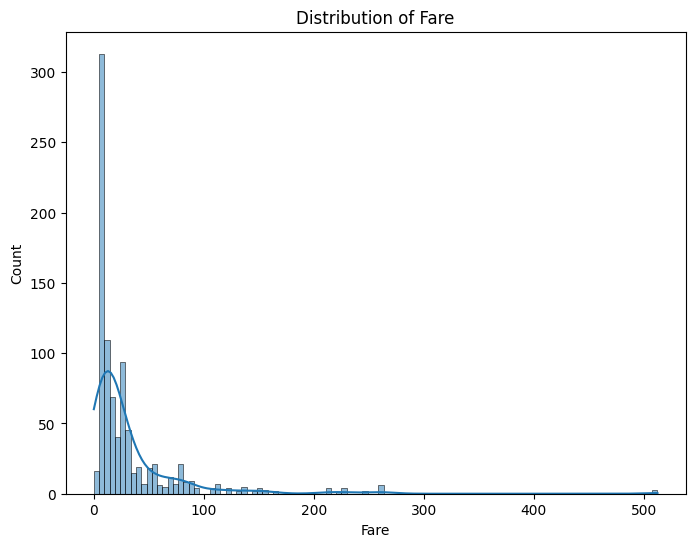

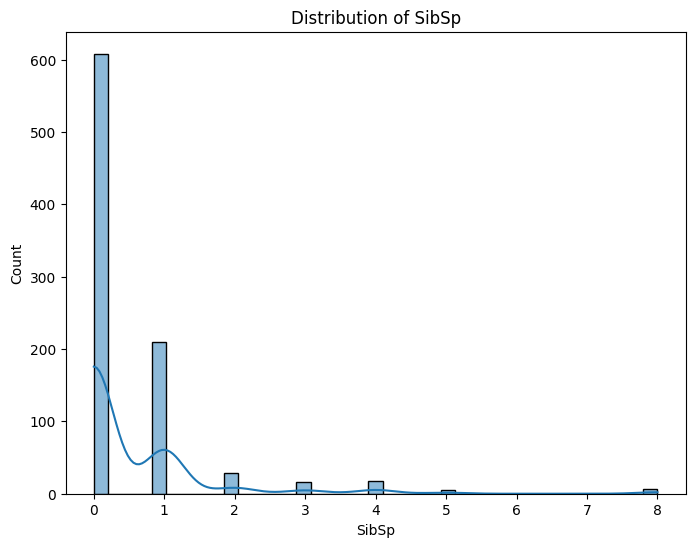

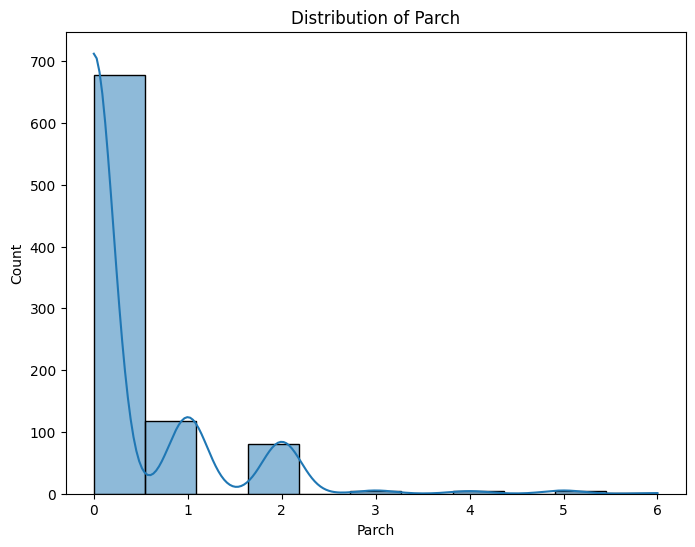

In [13]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
for feature in numeric_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(train_df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

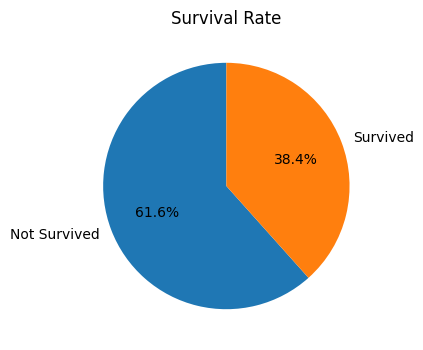

In [14]:
survived_counts = train_df['Survived'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate')
plt.show()


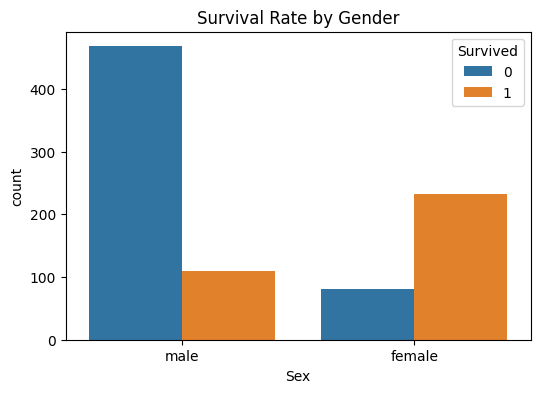

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

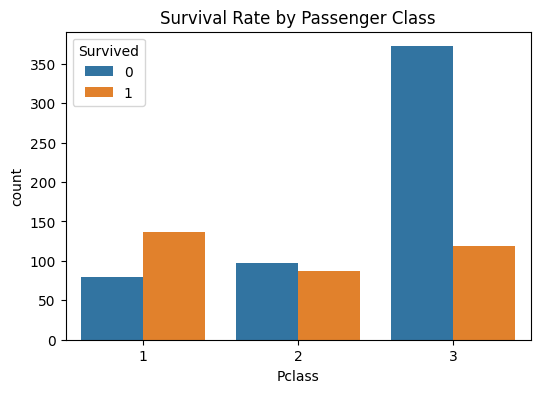

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

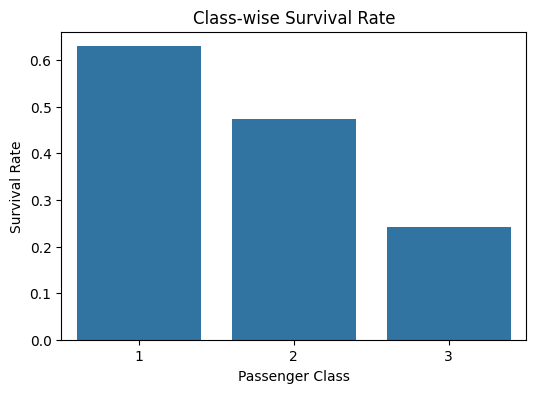

In [17]:
class_survival_rate = train_df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_survival_rate.index, y=class_survival_rate.values)
plt.title('Class-wise Survival Rate')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


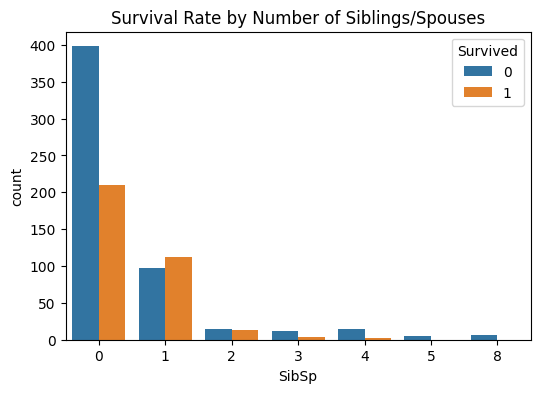

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.show()

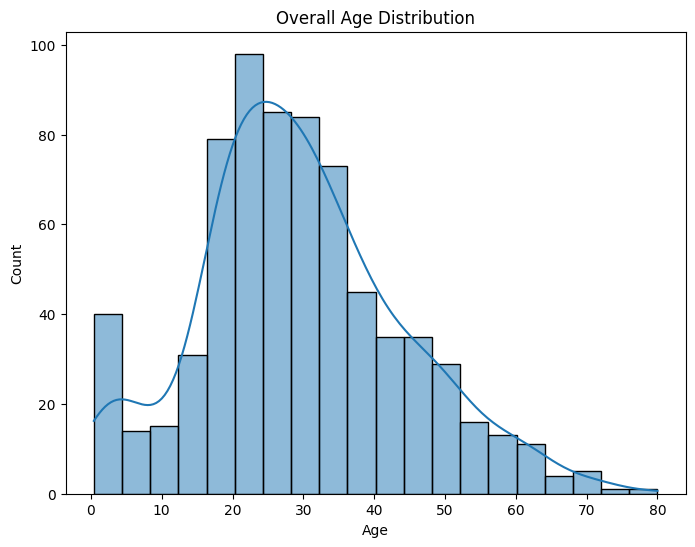

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Overall Age Distribution')
plt.show()

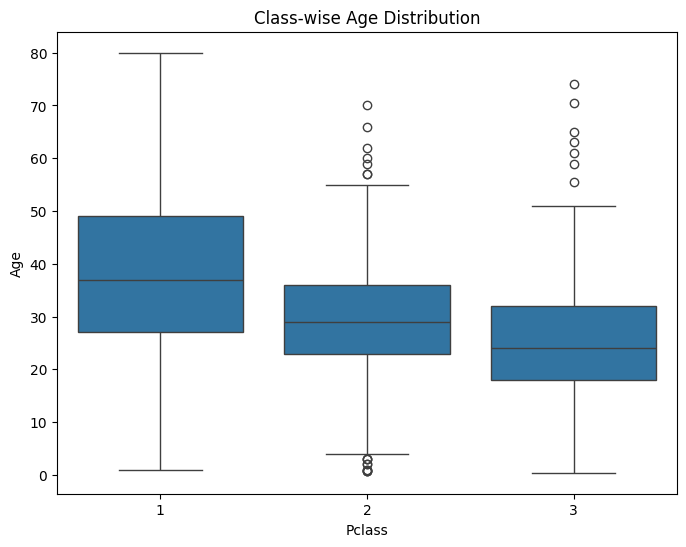

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Class-wise Age Distribution')
plt.show()

In [21]:

combined_df = pd.concat([train_df, test_df], ignore_index=True)

combined_df['Age'] = combined_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

features_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
combined_df = combined_df.drop(features_to_drop, axis=1)

combined_df = pd.get_dummies(combined_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

train_df_processed = combined_df[combined_df['Survived'].notna()]
test_df_processed = combined_df[combined_df['Survived'].isna()]

test_df_processed = test_df_processed.drop('Survived', axis=1)

print(train_df_processed.head())
print(test_df_processed.head())


   Survived   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0       0.0  22.0      1      0   7.2500      True       False        True   
1       1.0  38.0      1      0  71.2833     False       False       False   
2       1.0  26.0      0      0   7.9250     False       False        True   
3       1.0  35.0      1      0  53.1000     False       False        True   
4       0.0  35.0      0      0   8.0500      True       False        True   

   Pclass_2  Pclass_3  
0     False      True  
1     False     False  
2     False      True  
3     False     False  
4     False      True  
      Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
891  34.5      0      0   7.8292      True        True       False     False   
892  47.0      1      0   7.0000     False       False        True     False   
893  62.0      0      0   9.6875      True        True       False      True   
894  27.0      0      0   8.6625      True       False        True 